In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm

#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as sts
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

## for train test split
from sklearn.model_selection import train_test_split  

# Preprocessing
import sklearn.preprocessing as preproc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from scipy.stats import zscore

# Calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Read the dataset and understand the features and target variable

In [2]:
columns=["Industrial Risk","Management Risk","Financial Flexibility","Credibility","Competitiveness","Operating Risk","Class"]

In [3]:
df=pd.read_csv("Qualitative_Bankruptcy.data.txt",names =columns)

In [4]:
df.shape

(250, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [6]:
df.describe().T

,count,unique,top,freq
Industrial Risk,250,3,N,89
Management Risk,250,3,N,119
Financial Flexibility,250,3,N,119
Credibility,250,3,N,94
Competitiveness,250,3,N,103
Operating Risk,250,3,N,114
Class,250,2,NB,143


In [7]:
independent_features=df.drop('Class',axis=1)
independent_features.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,P,P,A,A,A,P
1,N,N,A,A,A,N
2,A,A,A,A,A,A
3,P,P,P,P,P,P
4,N,N,P,P,P,N


In [8]:
for col in independent_features:
    print(col,"\n",independent_features[col].unique())

Industrial Risk 
 ['P' 'N' 'A']
Management Risk 
 ['P' 'N' 'A']
Financial Flexibility 
 ['A' 'P' 'N']
Credibility 
 ['A' 'P' 'N']
Competitiveness 
 ['A' 'P' 'N']
Operating Risk 
 ['P' 'N' 'A']


In [9]:
le=LabelEncoder()
le_independent_features=independent_features.apply(le.fit_transform)

In [10]:
le_independent_features.corr()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
Industrial Risk,1.000000,0.110063,0.068694,-0.050432,0.060428,0.177573
Management Risk,0.110063,1.000000,-0.018999,-0.006609,-0.132174,0.253851
Financial Flexibility,0.068694,-0.018999,1.000000,-0.020124,0.150036,-0.064455
Credibility,-0.050432,-0.006609,-0.020124,1.000000,0.092155,0.054104
Competitiveness,0.060428,-0.132174,0.150036,0.092155,1.000000,-0.073031
Operating Risk,0.177573,0.253851,-0.064455,0.054104,-0.073031,1.000000


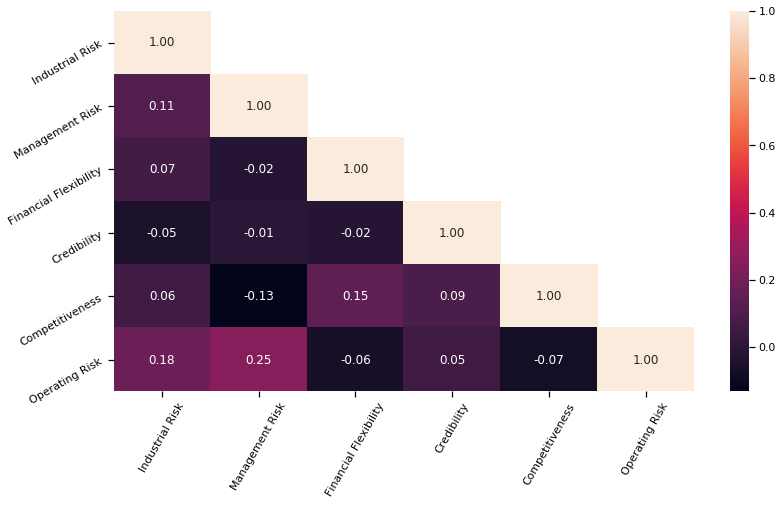

In [11]:
#Graphical representation of correlations between features
corr = le_independent_features.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=60)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

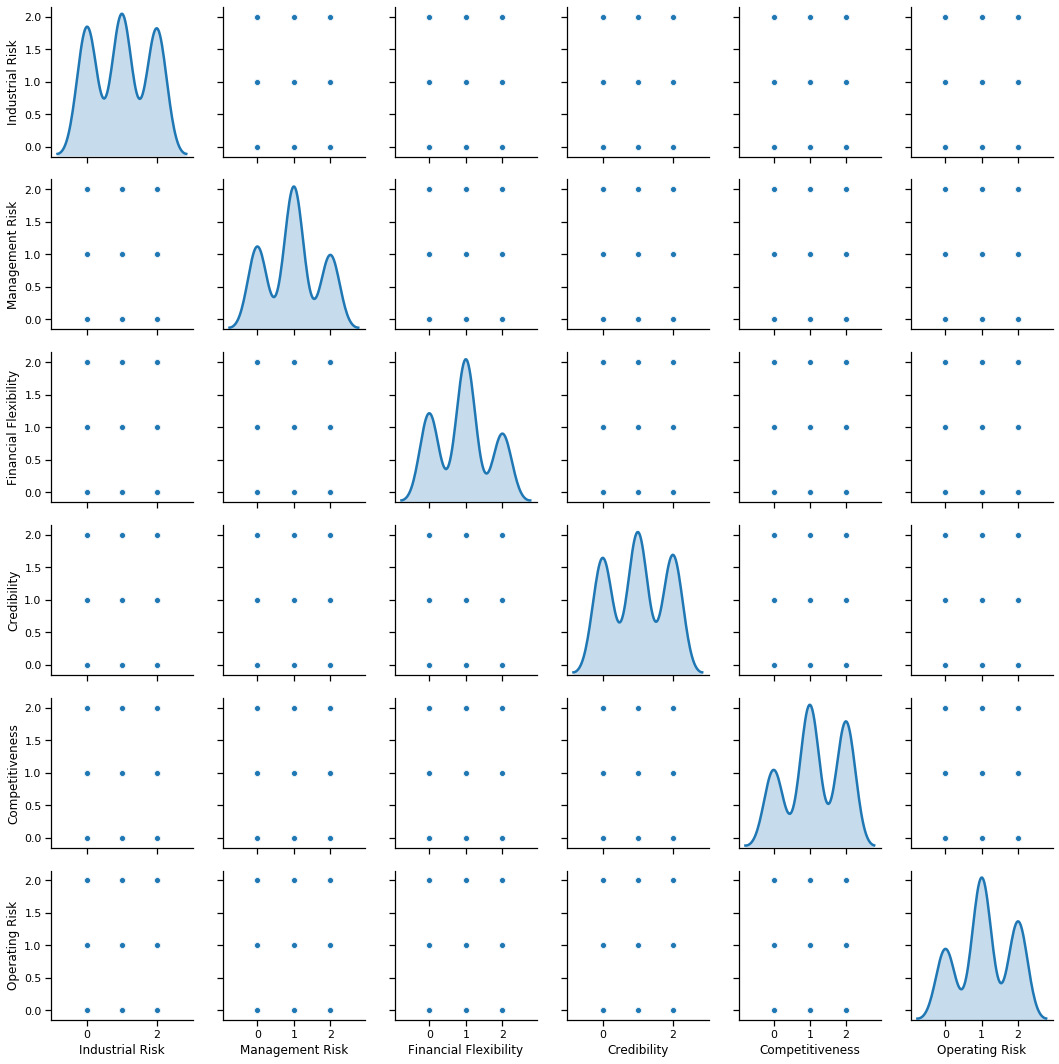

In [12]:
sns.pairplot(le_independent_features,diag_kind='kde')

# Encode independent features

In [47]:
OHE = OneHotEncoder()
features = OHE.fit_transform(df.drop('Class',axis=1)).toarray()
features

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

# Separate the dependant variable from the rest of the train data 

In [48]:
target=df['Class']

In [49]:
target

0      NB
1      NB
2      NB
3      NB
4      NB
5      NB
6      NB
7      NB
8      NB
9      NB
10     NB
11     NB
12     NB
13     NB
14     NB
15     NB
16     NB
17     NB
18     NB
19     NB
20     NB
21     NB
22     NB
23     NB
24     NB
25     NB
26     NB
27     NB
28     NB
29     NB
       ..
220     B
221     B
222     B
223     B
224     B
225     B
226     B
227     B
228     B
229     B
230     B
231     B
232     B
233     B
234     B
235     B
236     B
237     B
238     B
239     B
240     B
241     B
242     B
243     B
244     B
245     B
246     B
247     B
248     B
249     B
Name: Class, Length: 250, dtype: object

In [50]:
print("Features Shape -->",features.shape,"\nTarget Shape -->",target.shape)

Features Shape --> (250, 18) 
Target Shape --> (250,)


# Split the dataset into training and test data ( Take 80:20 ratio)

In [51]:
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=seed)

In [52]:
print("X_train shape -- > ",X_train.shape)
print("Y_train shape -- > ",y_train.shape)
print("X_test shape -- > ",X_test.shape)
print("Y_test shape -- > ",y_test.shape)

X_train shape -- >  (200, 18)
Y_train shape -- >  (200,)
X_test shape -- >  (50, 18)
Y_test shape -- >  (50,)


# Apply PCA on the independent features of train data

In [53]:
pca = PCA(n_components =  None)
pca.fit(X_train)
var_explained = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_explained)
print("Variance Values \n" , var_explained , '\n')
print("Cummulative Variance Values \n" , cum_var_exp)

Variance Values 
 [2.68693479e-01 1.26600587e-01 9.73597416e-02 9.35394980e-02
 7.82322402e-02 7.46670658e-02 6.52322202e-02 5.97230679e-02
 5.16979060e-02 4.40492703e-02 2.65048891e-02 1.37000346e-02
 4.76169559e-32 2.31007829e-32 1.91636502e-32 1.12371333e-32
 3.55092796e-33 2.78993471e-33] 

Cummulative Variance Values 
 [0.26869348 0.39529407 0.49265381 0.58619331 0.66442555 0.73909261
 0.80432483 0.8640479  0.91574581 0.95979508 0.98629997 1.
 1.         1.         1.         1.         1.         1.        ]


In [54]:
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 0.22221106 -0.12768844 -0.09452261  0.05442211 -0.06532663  0.01090452
   0.00256281  0.01175879 -0.01432161 -0.01577889 -0.01713568  0.03291457
   0.01246231 -0.01864322  0.0061809   0.0459799  -0.04201005 -0.00396985]
 [-0.12768844  0.23796482 -0.11027638 -0.05962312  0.09296482 -0.03334171
  -0.01711055  0.02879397 -0.01168342  0.00839196  0.01183417 -0.02022613
  -0.02984925  0.06786432 -0.03801508 -0.01670854  0.0481407  -0.03143216]
 [-0.09452261 -0.11027638  0.20479899  0.00520101 -0.02763819  0.02243719
   0.01454774 -0.04055276  0.02600503  0.00738693  0.00530151 -0.01268844
   0.01738693 -0.04922111  0.03183417 -0.02927136 -0.00613065  0.03540201]
 [ 0.05442211 -0.05962312  0.00520101  0.18590452 -0.12311558 -0.06278894
   0.01012563 -0.02005025  0.00992462 -0.02115578  0.00570352  0.01545226
  -0.01396985 -0.01665829  0.03062814  0.025      -0.02281407 -0.00218593]
 [-0.06532663  0.09296482 -0.02763819 -0.12311558  0.25125628 -0.1281407
  -0.04271357

#### Plotting the Cumulative Summation of the Explained Variance

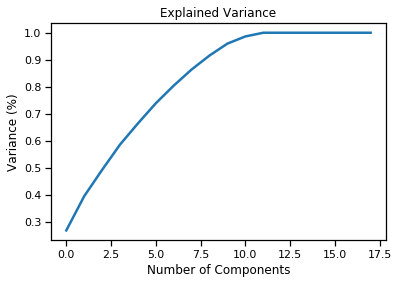

In [55]:
plt.figure()
plt.plot(cum_var_exp)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [56]:
#Number of components is 10

In [57]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-7.24136369e-02 -4.75185605e-01 -3.04712949e-02 -1.53685471e-01
   2.73163816e-01 -1.18535243e-02  3.33736696e-01 -2.74490595e-01
  -2.19667377e-01  2.84688222e-01 -1.41458667e-01  1.66706212e-02
  -1.45639808e-01  3.51160237e-02  2.42644040e-01 -2.90866364e-01
  -1.84577650e-01 -1.10706188e-01]
 [ 1.73972809e-01  4.48891554e-01  1.43418922e-01 -7.08154218e-02
   1.40440607e-01 -2.73988025e-01 -1.96236793e-01 -1.84308734e-01
   7.73907990e-02 -3.54294473e-01  1.92998600e-01  2.70700445e-01
  -1.45639808e-01  3.51160237e-02  2.42644040e-01 -2.90866364e-01
  -1.84577650e-01 -1.10706188e-01]
 [-1.01559172e-01  2.62940507e-02 -1.12947627e-01  2.24500893e-01
  -4.13604424e-01  2.85841549e-01 -1.37499903e-01  4.58799329e-01
   1.42276578e-01  6.96062515e-02 -5.15399332e-02 -2.87371066e-01
  -1.45639808e-01  3.51160237e-02  2.42644040e-01 -2.90866364e-01
  -1.84577650e-01 -1.10706188e-01]
 [-7.49052703e-02 -3.32736545e-01  5.78451098e-02  1.68350081e-01
   2.07452660e-01  

In [58]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [59]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 26.86934792  39.52940662  49.26538078  58.61933059  66.44255461
  73.90926119  80.43248321  86.40479     91.57458059  95.97950762
  98.62999654 100.         100.         100.         100.
 100.         100.         100.        ]


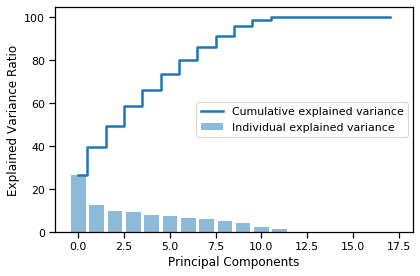

In [60]:
plt.figure(figsize=(6,4))
plt.bar(range(18), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(18), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [61]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
X_std = StandardScaler().fit_transform(X_train)
cluster_range = range( 1, 10)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X_std)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:100]

,num_clusters,cluster_errors
0,1,3600.000000
1,2,2785.796460
2,3,2512.227457
3,4,2312.585986
4,5,2142.922252
5,6,1999.573137
6,7,1881.568909
7,8,1792.629877
8,9,1690.836322


# Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance).

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

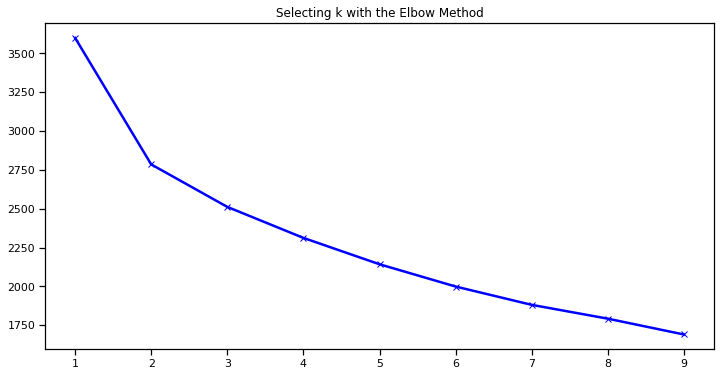

In [28]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, "bx-" )
plt.title('Selecting k with the Elbow Method')

# Transform the data using PCA ( select optimum number of PCs).

In [29]:
pca = PCA(n_components=10)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
cluster_range = range(2, 18)
X_std = StandardScaler().fit_transform(X_train)
y_std = y_train
X = X_std 
y = y_std

For n_clusters = 2 The average silhouette_score is : 0.2204107850959854


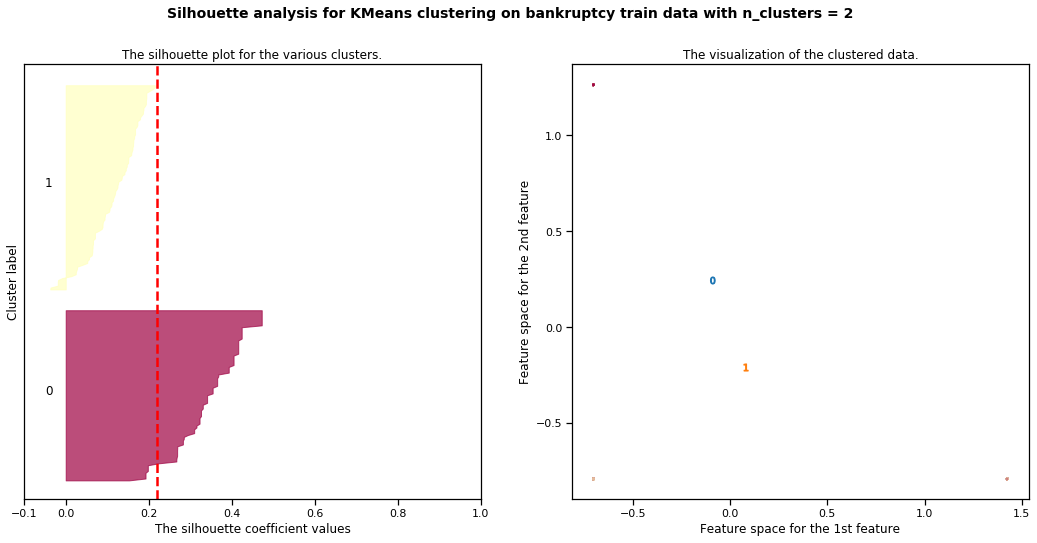

For n_clusters = 3 The average silhouette_score is : 0.21821804975562273


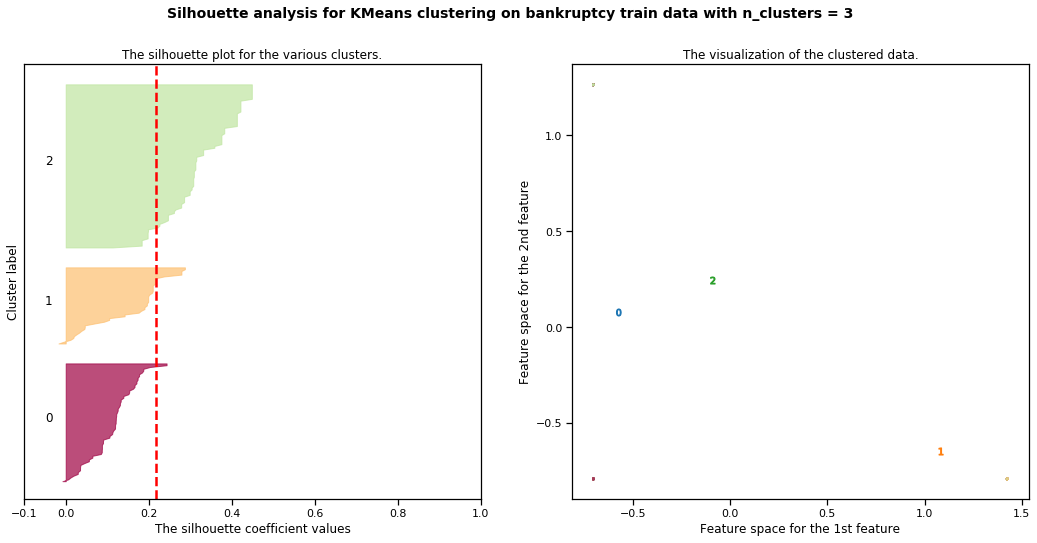

For n_clusters = 4 The average silhouette_score is : 0.22314229721492398


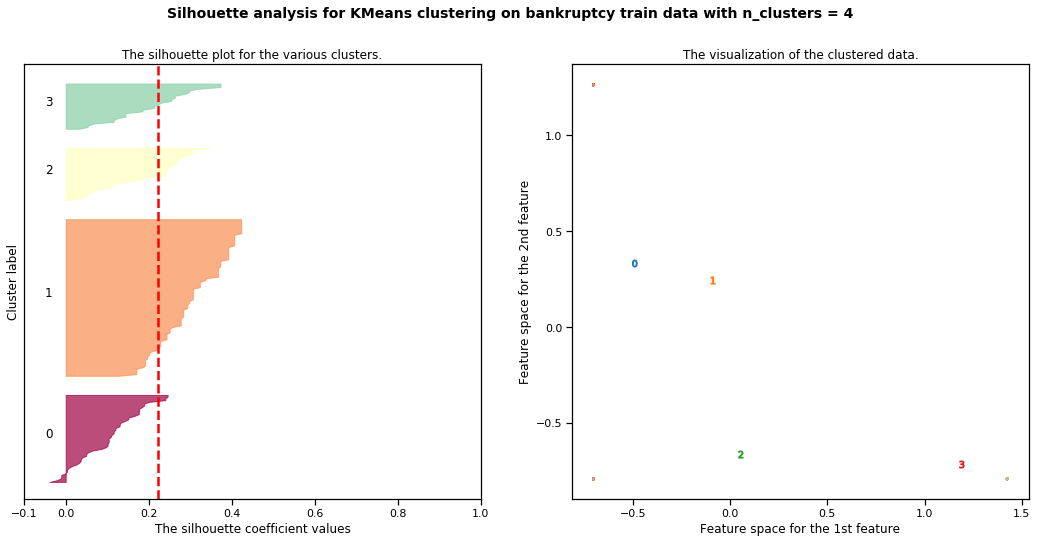

For n_clusters = 5 The average silhouette_score is : 0.17607627251916708


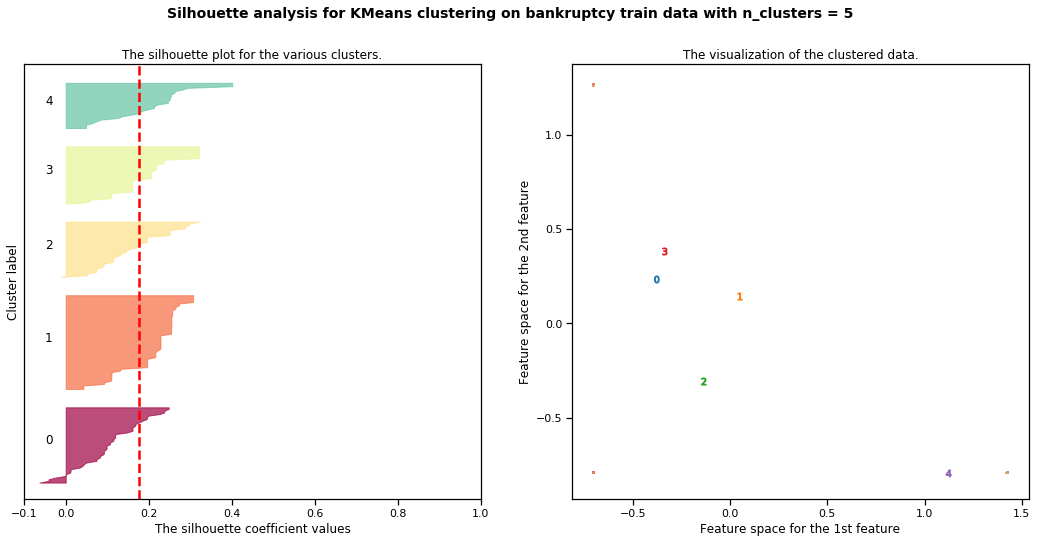

For n_clusters = 6 The average silhouette_score is : 0.18279725501656136


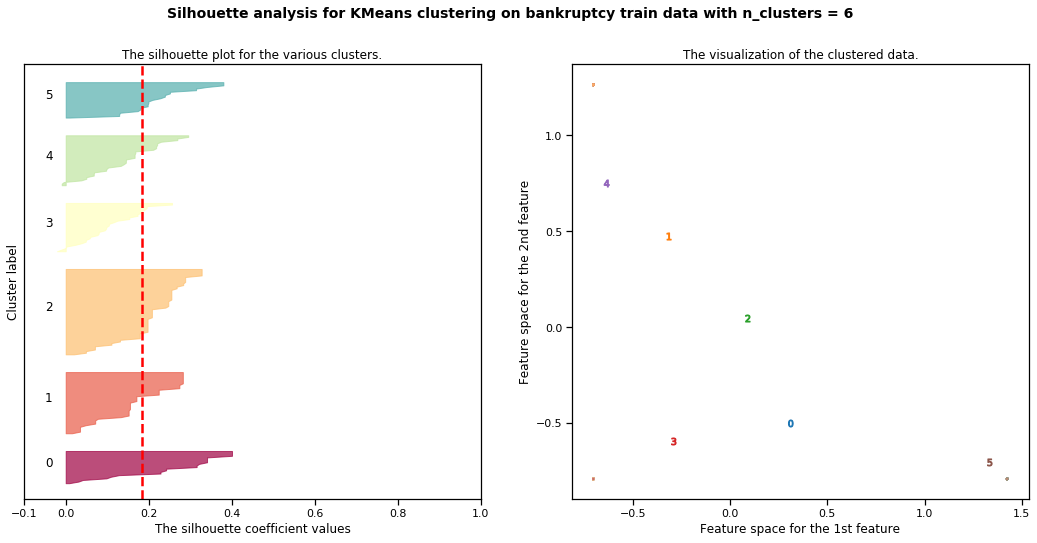

For n_clusters = 7 The average silhouette_score is : 0.19397982435015337


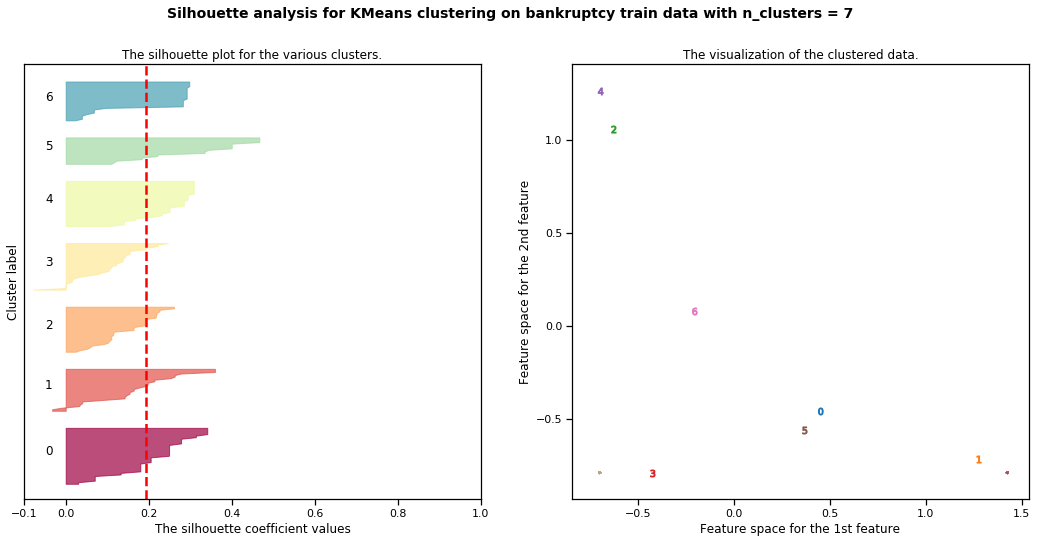

For n_clusters = 8 The average silhouette_score is : 0.20772691431726054


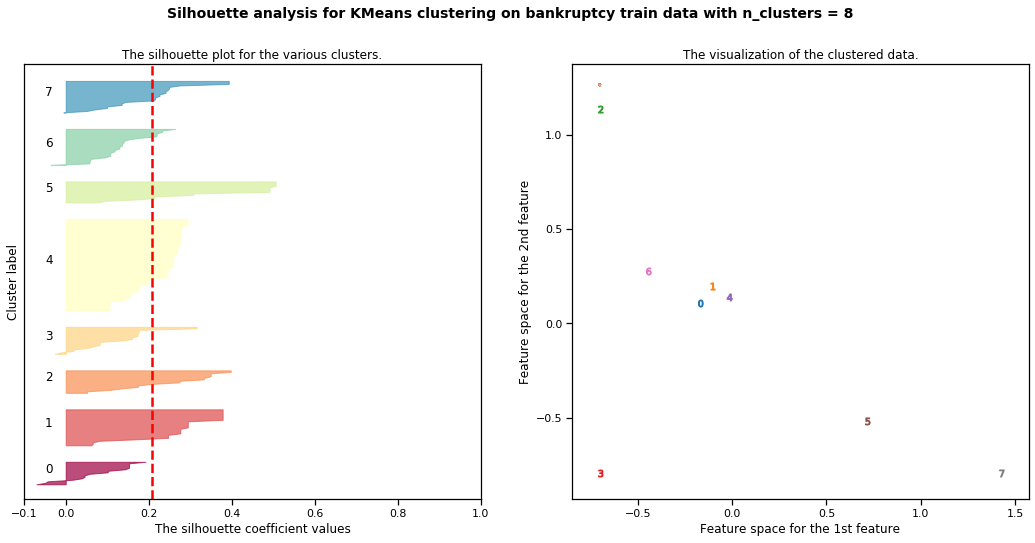

For n_clusters = 9 The average silhouette_score is : 0.21178293416138427


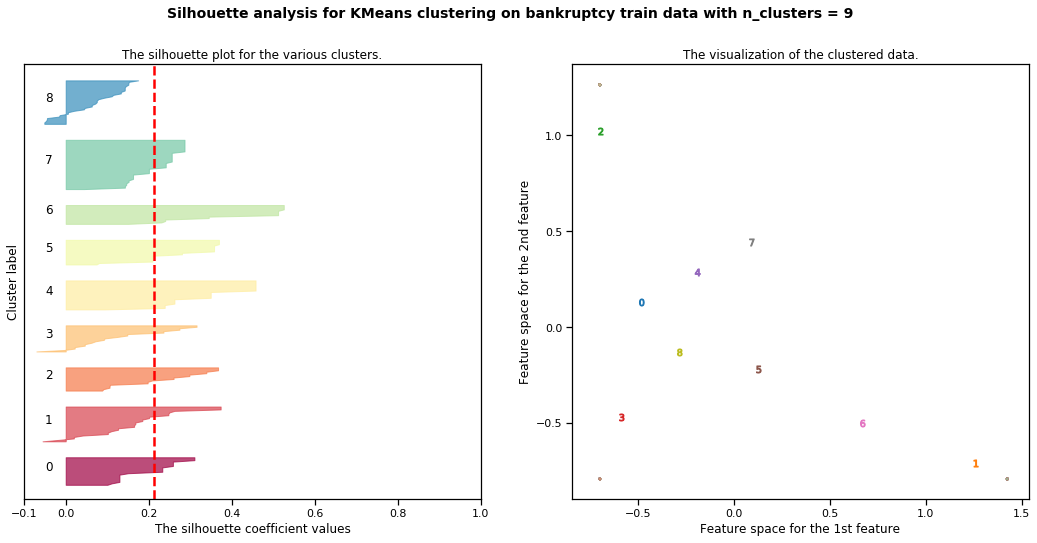

For n_clusters = 10 The average silhouette_score is : 0.20550991569372606


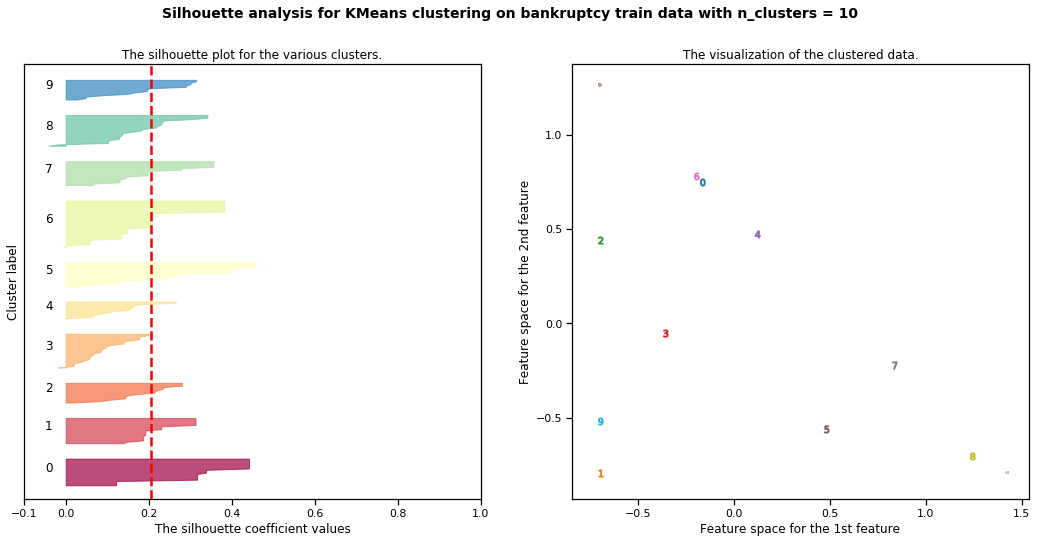

For n_clusters = 11 The average silhouette_score is : 0.21660568877651035


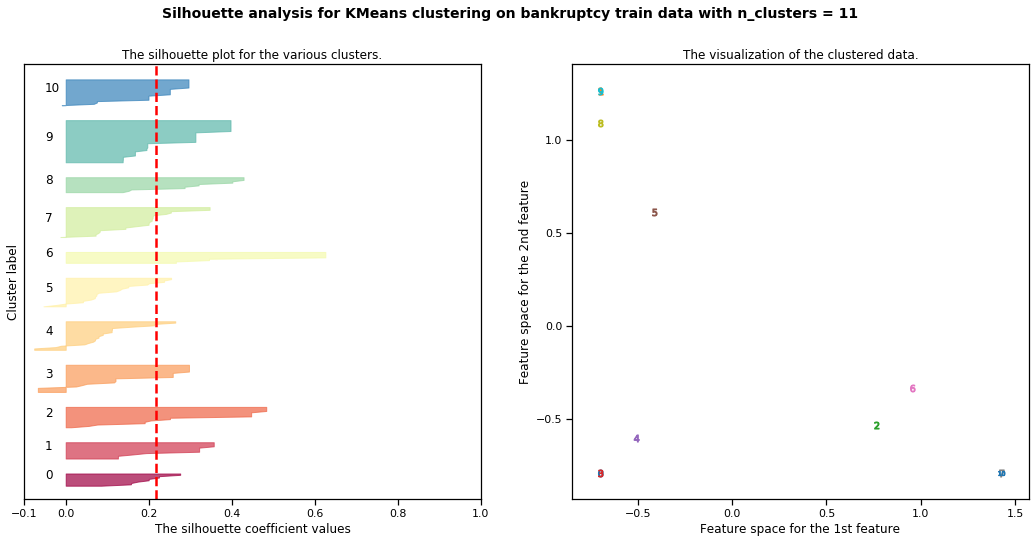

For n_clusters = 12 The average silhouette_score is : 0.2348803902279051


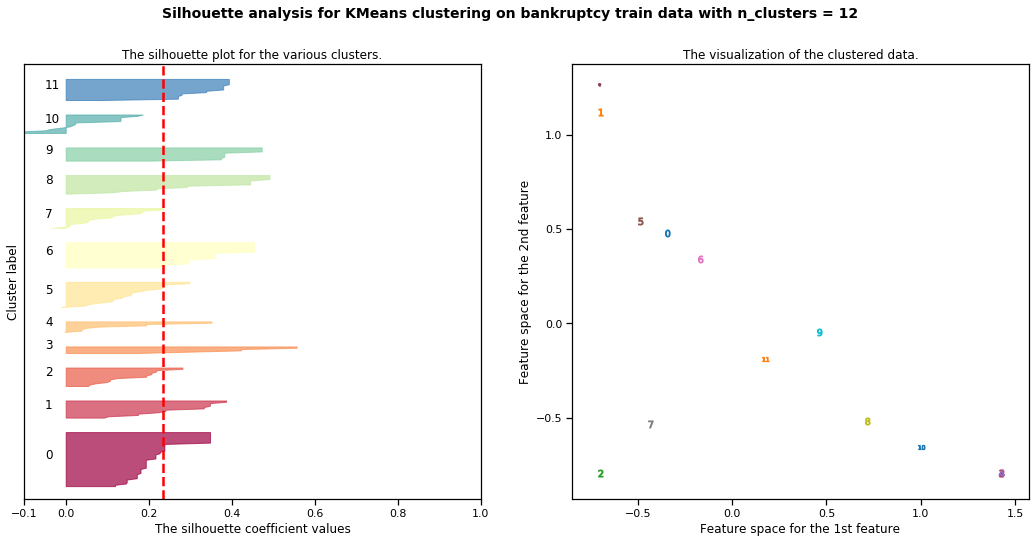

For n_clusters = 13 The average silhouette_score is : 0.2467376703640018


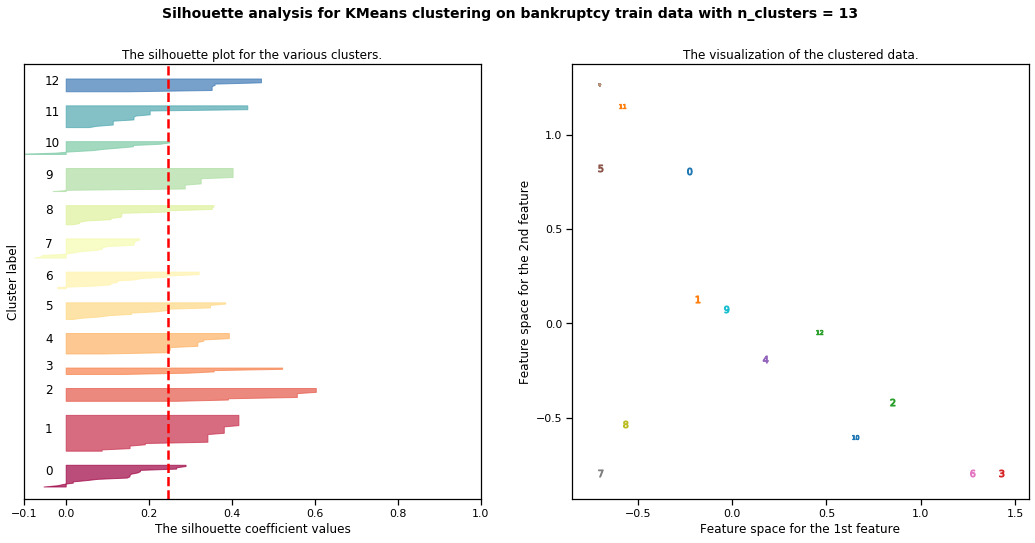

For n_clusters = 14 The average silhouette_score is : 0.2571102906127954


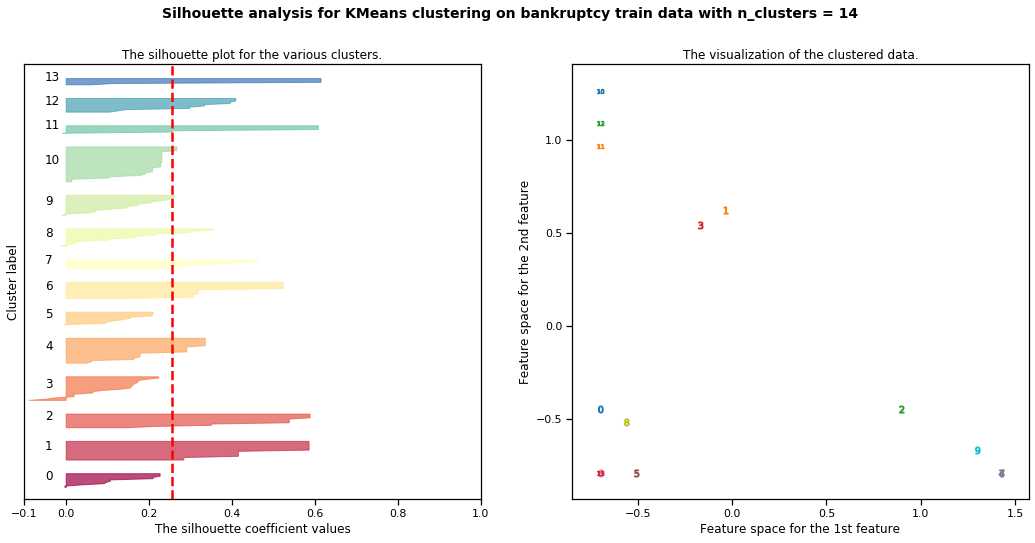

For n_clusters = 15 The average silhouette_score is : 0.252433017912719


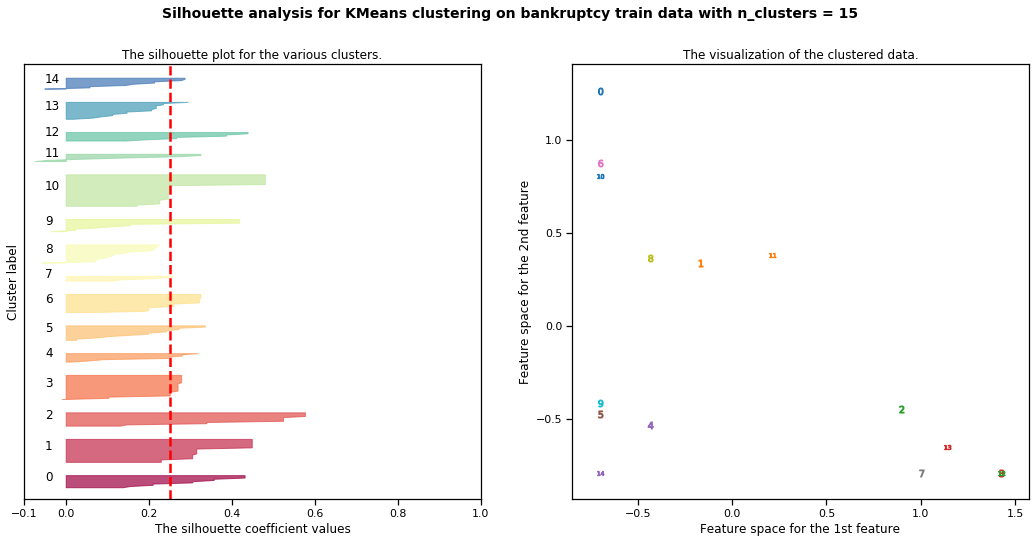

For n_clusters = 16 The average silhouette_score is : 0.2624193529843506


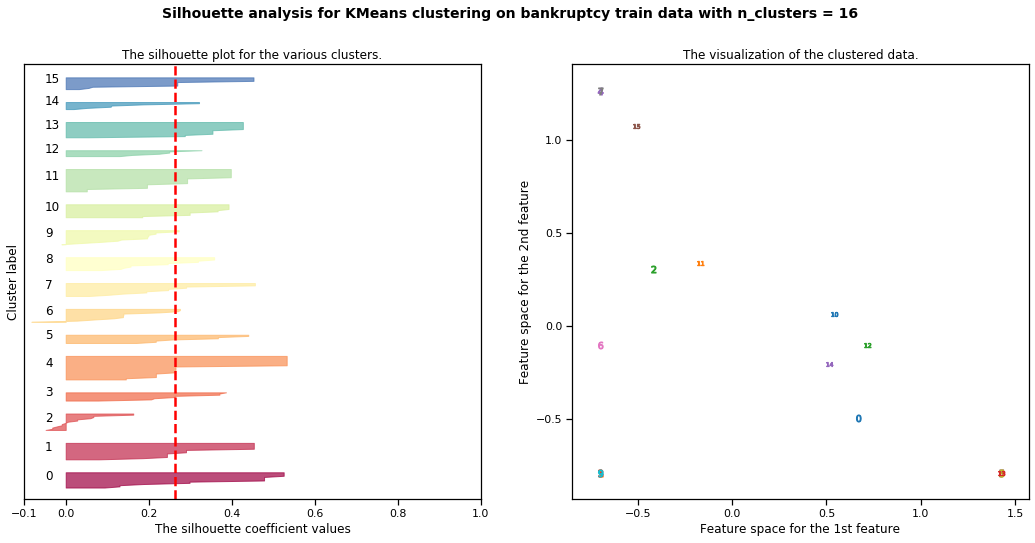

For n_clusters = 17 The average silhouette_score is : 0.28479536917760784


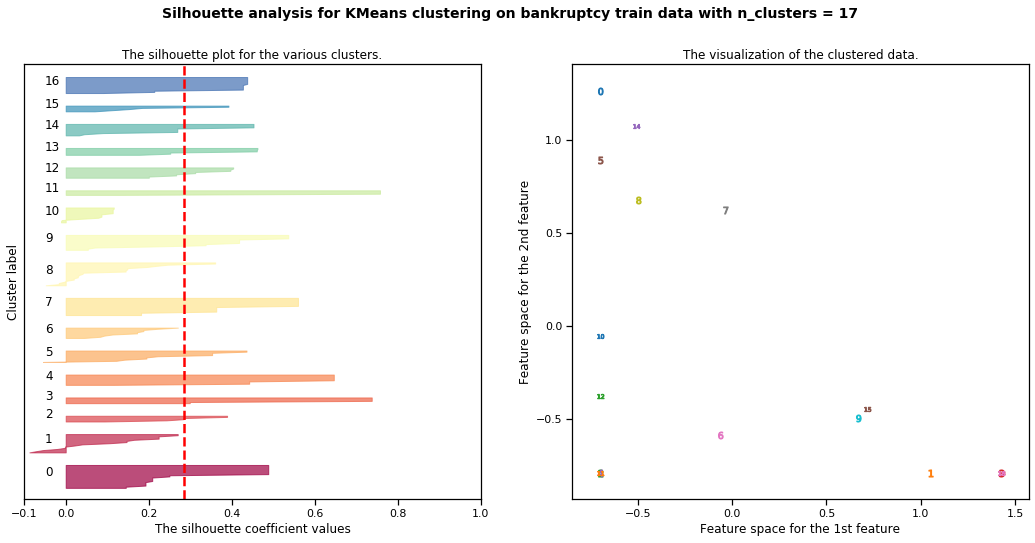

In [31]:
for n_clusters in cluster_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette 
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters, random_state=10)
    #print(clusterer)
    clusterer = clusterer.fit(X)
    clusterer_labels = clusterer.labels_     # capture the cluster lables
    
    #clusterer = KMeans(n_clusters=n_clusters,n_init = 100,init='k-means++',random_state=0)
    #cluster_labels = clusterer.fit_predict(X_train)
    
    #print("For n_clusters =", n_clusters,
    #      "The clusterer_labels is :", clusterer_labels)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    
    silhouette_avg = silhouette_score(X, clusterer_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, clusterer_labels)
    #print("For n_clusters =", n_clusters,
    #      "The sample silhouette_value is :", sample_silhouette_values)
    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[clusterer_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(clusterer_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.5,c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on bankruptcy train data "
        "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')
    plt.show()

# Apply KMeans algorithm on the above transformed data

In [62]:
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(X_train)
# Getting the cluster labels
cluster_labels = kmeans.predict(X_train)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("sklearn")
print("Centroid values")
print(centroids) # From sci-kit learn
print("Cluster labels")
print(cluster_labels) # From sci-kit learn

sklearn
Centroid values
[[ 2.85714286e-01  5.05494505e-01  2.08791209e-01  1.86813187e-01
   6.92307692e-01  1.20879121e-01  2.19780220e-02  9.78021978e-01
  -8.32667268e-17  1.64835165e-01  8.02197802e-01  3.29670330e-02
   4.39560440e-02  9.45054945e-01  1.09890110e-02  2.30769231e-01
   5.71428571e-01  1.97802198e-01]
 [ 3.66972477e-01  2.84403670e-01  3.48623853e-01  2.93577982e-01
   3.39449541e-01  3.66972477e-01  4.67889908e-01  1.19266055e-01
   4.12844037e-01  3.94495413e-01  3.66972477e-02  5.68807339e-01
   3.66972477e-01  9.17431193e-03  6.23853211e-01  2.20183486e-01
   3.66972477e-01  4.12844037e-01]]
Cluster labels
[0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1
 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1
 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1
 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0

In [63]:
X_train.shape

(200, 18)

In [64]:
cluster_labels.shape

(200,)

# Create a new column in the train data and populate it with the cluster labels. 

In [65]:
X_train=np.column_stack([X_train,cluster_labels])

In [66]:
X_train.shape

(200, 19)

# Transform the test data using the same PCA object that was fit on the train data. 

In [67]:
X_test_pca=pca.transform(X_test)

In [68]:
X_test.shape

(50, 18)

# Use the same kmeans object, assign cluster labels to the test data and store it as a feature.

In [69]:
cluster_labels = kmeans.predict(X_test)

In [70]:
cluster_labels

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0])

In [71]:
cluster_labels.shape

(50,)

In [72]:
X_test=np.column_stack([X_test,cluster_labels])

In [73]:
X_test.shape

(50, 19)

# Apply SVC model on train dataset and predict target for test dataset

In [74]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Check accuracy and confusion matrix.

In [75]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.99
1.0


In [76]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[16  0]
 [ 0 34]]
